### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Datasets Information:`

*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating

*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)


*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use

**`Please provide your insights wherever necessary.`**

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### 1. Import the necessary packages - 2.5 marks

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'wx', 'qt4', 'qt5', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'inline', 'ipympl', 'widget']


In [ ]:
%matplotlib inline

### 2. Read the 3 datasets into dataframes - 2.5 marks

In [147]:
data=pd.read_csv('Data.csv')
item =pd.read_csv('item.csv')
user=pd.read_csv('user.csv')

In [148]:
data

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [ ]:
item.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


### 3. Apply info, shape, describe, and find the number of missing values in the data. Present at least 3 observations from these operations - 2.5 marks
 - Note that you will need to do it for all the three datasets seperately

In [ ]:
data.info()
print(data.shape)
describedata = data["rating"].describe() 
print(describedata)
data.describe(include = "all")
# show the boolean dataframe             
print(" \n Displaying boolean Dataframe : \n\n", data.isnull()) 
  
# Count total NaN in a DataFrame 
print(" \nCount total NaN in a DataFrame : \n\n", 
       data.isnull().sum() )


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
(100000, 4)
count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64
 
 Displaying boolean Dataframe : 

        user id  movie id  rating  timestamp
0        False     False   False      False
1        False     False   False      False
2        False     False   False      False
3        False     False   False      False
4        False     False   False      False
...        ...       ...     ...        ...
99995    False     False   False      False
99996

In [ ]:
item.info()
print(item.shape)
itemshape = item.shape
print('\nDataFrame Shape :', itemshape)
print('\nNumber of rows in item dataframe :', itemshape[0])
print('\nNumber of columns in item  dataframe :', itemshape[1])                                                                
describeitem = item["Comedy"].describe() 
print(describeitem)
# show the boolean dataframe             
print(" \n Displaying boolean item Dataframe : \n\n", item.isnull()) 
  
# Count total NaN in a DataFrame 
print(" \nCount total NaN in item DataFrame : \n\n", 
       item.isnull().sum() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [ ]:
user.info()
print(user.shape)
usershape = user.shape
print('\nDataFrame Shape :', usershape)
print('\nNumber of rows in user dataframe :', usershape[0])
print('\nNumber of columns in user dataframe :', usershape[1])                                                                
describeUser = user["gender"].describe() 
print(describeUser)
# show the boolean dataframe             
print(" \n Displaying boolean user Dataframe : \n\n", user.isnull()) 
  
# Count total NaN in a DataFrame 
print(" \nCount total NaN in user DataFrame : \n\n", 
       user.isnull().sum() )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
(943, 5)

DataFrame Shape : (943, 5)

Number of rows in user dataframe : 943

Number of columns in user dataframe : 5
count     943
unique      2
top         M
freq      670
Name: gender, dtype: object
 
 Displaying boolean user Dataframe : 

      user id    age  gender  occupation  zip code
0      False  False   False       False     False
1      False  False   False       False     False
2      False  False   False       False     False
3      False  False   False       False     False
4      False  False   False       False     False
..       ...    ...  

In [ ]:
item.describe(include = "all")


,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681,1681,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
unique,NaN,1658,240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,That Darn Cat!,01-Jan-1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3,215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,841.841761,NaN,NaN,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,NaN,NaN,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Shape gives rows and columns of data frame


** *italicized text*Observations:**

1.   No null values
2.   Generes are binary




### 4. Find the number of movies per genre using the item data - 2.5 marks

In [ ]:
itembeforecompuation=item
def SumOfColumns(x):
    y = x.sum(axis=0)
    print("Computed DataFrame:")
    print(y)
    print("\nAfter removing first 3 rows of the said DataFrame:")
    print("\nNumber of movies per genre using the item data:")
    df1 = y.iloc[3:]
    return df1
SumOfColumns(item)

Computed DataFrame:
movie id                                                  1415136
movie title     Toy Story GoldenEye Four Rooms Get Shorty Copy...
release date    01-Jan-199501-Jan-199501-Jan-199501-Jan-199501...
unknown                                                         1
Action                                                        251
Adventure                                                     135
Animation                                                      42
Childrens                                                     122
Comedy                                                        505
Crime                                                         109
Documentary                                                    50
Drama                                                         725
Fantasy                                                        22
Film-Noir                                                      24
Horror                                                  

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: object

**Insights:**

1.   Drama is the highest





### 5. Drop the movie where the genre is unknown - 2.5 marks

In [152]:
DataFrameWithoutUnknownType = pd.read_csv('item.csv')
print(" \n Dataframe on dropping 'Unknown' columns :\n\n")
DataFrameWithoutUnknownType.drop(columns='unknown')
DataFrameWithoutUnknownType.drop(["unknown"], axis=1, inplace=True)
DataFrameWithoutUnknownType.columns

 
 Dataframe on dropping 'Unknown' columns :




Index(['movie id', 'movie title', 'release date', 'Action', 'Adventure',
       'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

**Insights:**

1.  DataFrameWithoutUnknownType.drop(["unknown"], axis=1, inplace=True)
 is the apt way to drop columns
2.   Inplace must be true




### 6. Find the movies that have more than one genre - 5 marks

> Indented block



hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [ ]:
item.columns

Index(['movie id', 'movie title', 'release date', 'unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [68]:
MovieGenreCalculation = pd.read_csv('item.csv')
MovieGenreCalculation.columns
MovieGenreCalculation["Genres"] =MovieGenreCalculation.loc[:,'Action':'Western'].sum(axis=1)
MovieGenreCalculation = MovieGenreCalculation[MovieGenreCalculation.Genres > 1]

print(" \n Displaying Movies Genre Count:\n\n",MovieGenreCalculation[['movie title', 'Genres']])
print(" \n Displaying Movies Genre with count of 6 : \n\n",MovieGenreCalculation[MovieGenreCalculation.Genres ==6][['movie title', 'Genres']])
print(" \n Displaying  Movies Genre with count of 5 : \n\n",MovieGenreCalculation[MovieGenreCalculation.Genres ==5 ][['movie title', 'Genres']])
print(" \n Displaying  Movies Genre with count of 4  : \n\n",MovieGenreCalculation[MovieGenreCalculation.Genres ==4][['movie title', 'Genres']])
print(" \n Displaying  Movies Genre with count of 3 : \n\n",MovieGenreCalculation[MovieGenreCalculation.Genres ==3][['movie title', 'Genres']])
print(" \n Displaying  Movies Genre with count of 2  : \n\n",MovieGenreCalculation[MovieGenreCalculation.Genres ==2][['movie title', 'Genres']])


 
 Displaying Movies Genre Count:

              movie title  Genres
0             Toy Story        3
1             GoldenEye        3
3            Get Shorty        3
4               Copycat        3
6        Twelve Monkeys        2
...                  ...     ...
1667  MURDER and murder        3
1668            Tainted        2
1671             Mirage        2
1677          B. Monkey        2
1678      Sliding Doors        2

[849 rows x 2 columns]
 
 Displaying Movies Genre with count of 6 : 

                         movie title  Genres
171       Empire Strikes Back, The        6
424   Transformers: The Movie, The        6
558  Kid in King Arthur's Court, A        6
 
 Displaying  Movies Genre with count of 5 : 

                   movie title  Genres
16       From Dusk Till Dawn        5
20    Muppet Treasure Island        5
49                 Star Wars        5
100              Heavy Metal        5
180       Return of the Jedi        5
183         Army of Darkness        5
753  

**Insights:**

Count =849





### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

> Indented block



*HINT: Use distplot for age and countplot for release year, ratings, *

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

In [ ]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


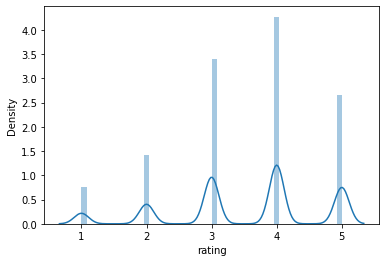

In [87]:
sns.distplot(data.rating.dropna())


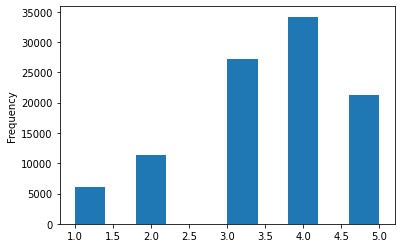

In [5]:
data["rating"].dropna().plot.hist()

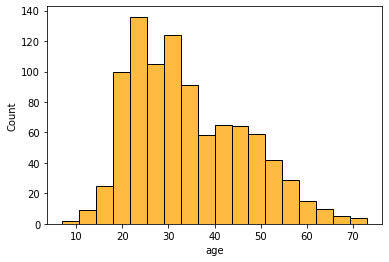

In [6]:
sns.histplot(user['age'],color='orange')
plt.show()


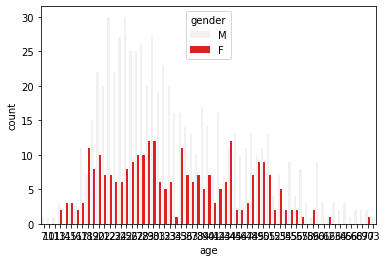

In [7]:
countplotforusergender = pd.read_csv('user.csv')
sns.countplot(x="age",hue="gender", data=countplotforusergender, color='red') 

In [22]:
def plot_data(data):
   

    # age distribution plot
    sns.countplot(y='age', data=data).set_title('Univariant distribution of age using count plot')
    plt.show()

    # gender distribution plot
    sns.countplot(x='gender', data=data).set_title('Univariant distribution of gender using count plot')
    plt.show()

    # occupation distribution plot
    sns.countplot(x='occupation', data=data).set_title('Univariant distribution of occupation using count plot')
    plt.show()


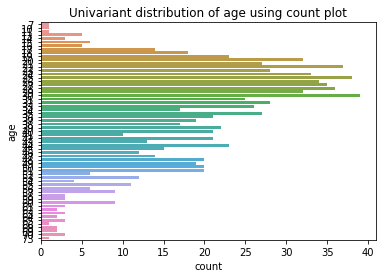

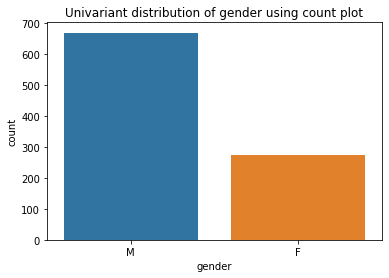

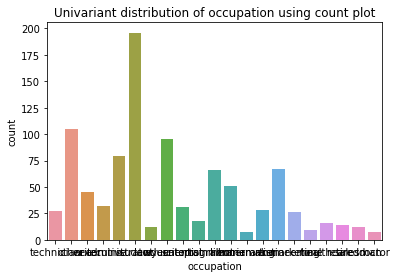

In [23]:
plot_data(user)

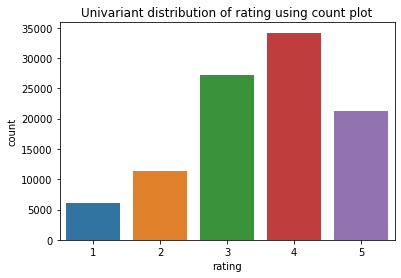

In [27]:
sns.countplot(x='rating', data=data).set_title('Univariant distribution of rating using count plot')
plt.show()

0       1995
1       1995
2       1995
3       1995
4       1995
        ... 
1676    1998
1677    1998
1678    1998
1679    1994
1680    1996
Name: release year trimmed, Length: 1681, dtype: object


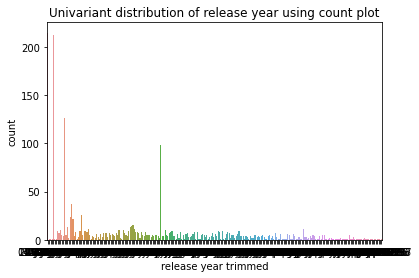

In [51]:
RetreiveYear=pd.read_csv('item.csv')
RetreiveYear["release year trimmed"] = RetreiveYear["release date"]
print(RetreiveYear["release year trimmed"].str[-4:] )
sns.countplot(x='release year trimmed', data=RetreiveYear).set_title('Univariant distribution of release year using count plot')
plt.show()

### 8. Visualize how popularity of genres has changed 

---

over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use item dataset to get count of movies released in a particular year, store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.

In [132]:
FindNumberOfreleasesInyear= RetreiveYear.groupby('release year trimmed').sum()


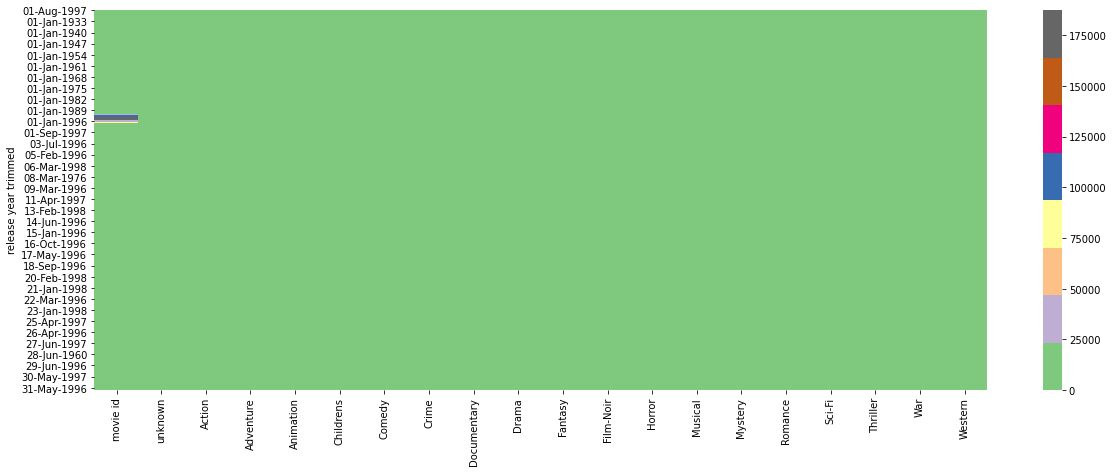

In [146]:
moviecount = RetreiveYear.groupby('release year trimmed')['movie id'].count()

plt.figure(figsize=(20,7))  
sns.heatmap(FindNumberOfreleasesInyear, cmap='Accent')  
plt.show()

**Insights:**



### 9. Find the top 25 movies in terms of average ratings for movies that have been rated more than 100 times - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [120]:
getmovieratings = pd.merge(data, item)
mapuserandrating = pd.merge(movie_ratings, user)
highestrated = mapuserandrating.groupby('movie title').size().sort_values(ascending=False)[:25]
highestrated

movie title
Star Wars                              583
Contact                                509
Fargo                                  508
Return of the Jedi                     507
Liar Liar                              485
English Patient, The                   481
Scream                                 478
Toy Story                              452
Air Force One                          431
Independence Day (ID4)                 429
Raiders of the Lost Ark                420
Godfather, The                         413
Pulp Fiction                           394
Twelve Monkeys                         392
Silence of the Lambs, The              390
Jerry Maguire                          384
Chasing Amy                            379
Rock, The                              378
Empire Strikes Back, The               367
Star Trek: First Contact               365
Back to the Future                     350
Titanic                                350
Mission: Impossible                    344

### 10. Check for the validity of the below statements with respect to the data provided - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

**Please pay attention to what should be the denominator while calculating percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [66]:
 mergeddataframe=data.merge(item).merge(user)

print(mergeddataframe)

mergeddataframe.columns

mergeddataframe.dropna

       user id  movie id  rating  timestamp  ... age gender     occupation  zip code
0          196       242       3  881250949  ...  49      M         writer     55105
1          196       257       2  881251577  ...  49      M         writer     55105
2          196       111       4  881251793  ...  49      M         writer     55105
3          196        25       4  881251955  ...  49      M         writer     55105
4          196       382       4  881251843  ...  49      M         writer     55105
...        ...       ...     ...        ...  ...  ..    ...            ...       ...
99986      873       313       5  891392177  ...  48      F  administrator     33763
99987      873       326       4  891392656  ...  48      F  administrator     33763
99988      873       348       3  891392577  ...  48      F  administrator     33763
99989      873       358       2  891392698  ...  48      F  administrator     33763
99990      873       342       4  891392698  ...  48      F  admi

<bound method DataFrame.dropna of        user id  movie id  rating  timestamp  ... age gender     occupation  zip code
0          196       242       3  881250949  ...  49      M         writer     55105
1          196       257       2  881251577  ...  49      M         writer     55105
2          196       111       4  881251793  ...  49      M         writer     55105
3          196        25       4  881251955  ...  49      M         writer     55105
4          196       382       4  881251843  ...  49      M         writer     55105
...        ...       ...     ...        ...  ...  ..    ...            ...       ...
99986      873       313       5  891392177  ...  48      F  administrator     33763
99987      873       326       4  891392656  ...  48      F  administrator     33763
99988      873       348       3  891392577  ...  48      F  administrator     33763
99989      873       358       2  891392698  ...  48      F  administrator     33763
99990      873       342       

**Conclusion:**
    


In [79]:


df1=pd.DataFrame(mergeddataframe.groupby(["age"])["rating"].mean())
df1


df2=pd.DataFrame(mergeddataframe.groupby(["gender"])["rating"].mean())
df2


,rating
gender,
F,3.531510
M,3.529298


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

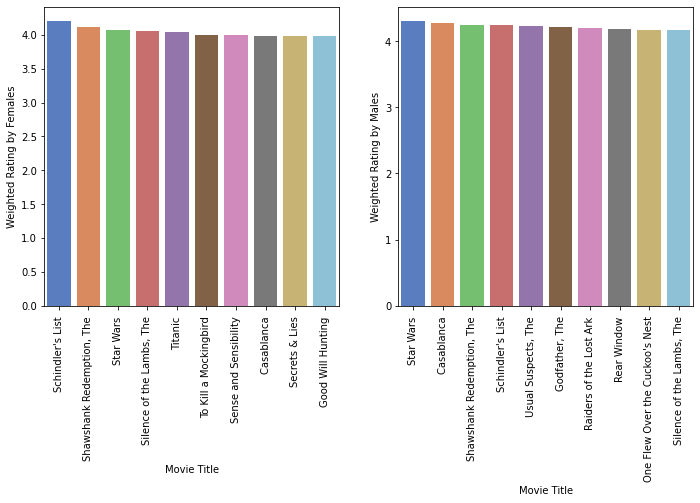

In [108]:
df = pd.merge(data, item, on='movie id')
CompareGender = pd.merge(df, user, on='user id')

female_movies = CompareGender = pd.merge(df, user, on='user id').groupby('gender').get_group('F')
female_rating = data['rating'].mean()
top_female_movies = pd.DataFrame()
top_female_movies['mean_rating'] = female_movies.groupby('movie title')['rating'].mean()
top_female_movies['num_ratings'] = female_movies.groupby('movie title')['rating'].count()
top_female_movies['BE'] = (top_female_movies['num_ratings']*top_female_movies['mean_rating']+50*female_rating)/(top_female_movies['num_ratings']+50)
top_female_movies.reset_index(level=0, inplace=True)

male_movies = tmp.groupby('gender').get_group('M')
male_rating = data['rating'].mean()
top_male_movies = pd.DataFrame()
top_male_movies['mean_rating'] = male_movies.groupby('movie title')['rating'].mean()
top_male_movies['num_ratings'] = male_movies.groupby('movie title')['rating'].count()
top_male_movies['BE'] = (top_male_movies['num_ratings']*top_male_movies['mean_rating']+50*male_rating)/(top_male_movies['num_ratings']+50)
top_male_movies.reset_index(level=0, inplace=True)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
plt.tight_layout(pad=2)

plt.subplot(1,2,1)
sns.barplot(x=top_female_movies.sort_values('BE', ascending=False)['movie title'][:10], y=top_female_movies['BE'].sort_values(ascending=False)[:10], palette='muted')
plt.xlabel('Movie Title')
plt.ylabel('Weighted Rating by Females')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x=top_male_movies.sort_values('BE', ascending=False)['movie title'][:10], y=top_male_movies['BE'].sort_values(ascending=False)[:10], palette='muted')
plt.xlabel('Movie Title')
plt.ylabel('Weighted Rating by Males')
plt.xticks(rotation=90)

